<a href="https://colab.research.google.com/github/SaranyaSajeesh/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**



*   Predicting customer churn is critical for companies to be able to effectively
retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly.


*    It is a binary classification problem for an imbalanced dataset.










  





**The data set includes information about:**




*   Customers who left within the last month – the column is called Churn

*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*  Demographic info about customers – gender, age range, and if they have partners and dependents




# **Aim :**


* To classify the potential churn customers based on numerical and categorical features.

* It is a binary classification problem for an imbalanced dataset.




# **Dataset Attributes**

1-**gender** : Whether the customer is a male or a female

2-**SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)

3-**Partner** : Whether the customer has a partner or not (Yes, No)

4-**Dependents** : Whether the customer has dependents or not (Yes, No)

5-**tenure** : Number of months the customer has stayed with the company

6-**PhoneService** : Whether the customer has a phone service or not (Yes, No)

7-**MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No
phone service)

8-**InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)

9-**OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)

10-**OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)

11-**DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)

12-**TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)

13-**StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)

14-**StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)

15-**Contract** : The contract term of the customer (Month-to-month, One year, Two year)

16-**PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)

17-**PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

18-**MonthlyCharges** : The amount charged to the customer monthly

19-**TotalCharges** : The total amount charged to the customer

20-**Churn** : Whether the customer churned or not (Yes or No)

# **Import** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# **Preparing** **dataset**

Read dataset and create DataFrame

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle datasets/IT_customer_churn.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **EDA**

Get the no.of rows and columns in the dataset

In [3]:
df.shape

(7043, 20)

Get information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Check missing values

In [5]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check features type

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Describe all data

In [7]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Get no.of unique values of each column

In [8]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Get unique values of object features

In [9]:
categorical_cols=['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup',
      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in categorical_cols:
  print(col,":",df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# **Data** **Visualization**

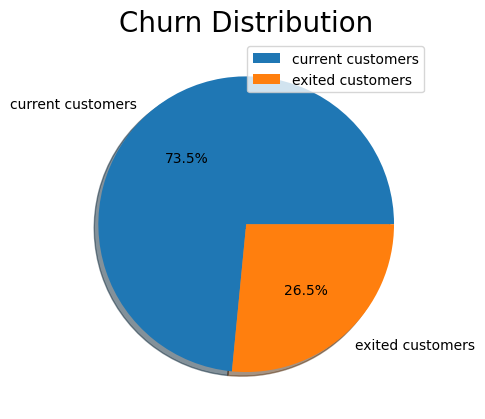

In [10]:
plt.pie(df["Churn"].value_counts(),labels=["current customers","exited customers"],shadow=True,autopct="%.01f%%")
plt.legend()
plt.title("Churn Distribution", size = 20)
plt.show()

**Observations:**


* According to data 26.5% customers are exited and 73.5% customers are not exited






<Axes: xlabel='Churn', ylabel='count'>

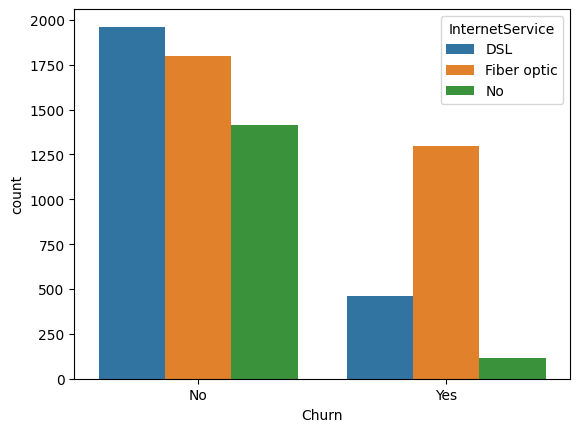

In [11]:
sns.countplot(x='Churn',data=df,hue='InternetService')

**Observations:**


*   We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.



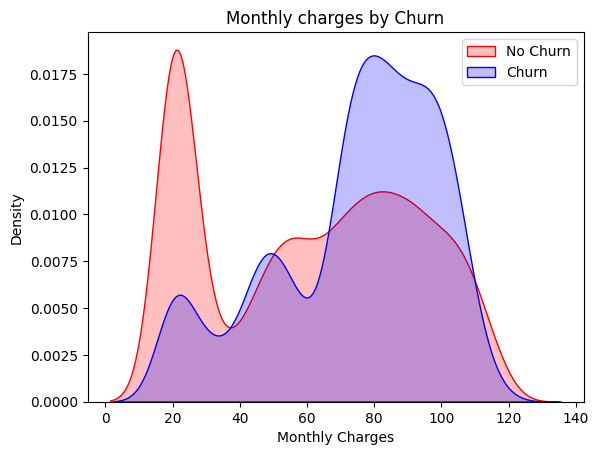

In [12]:
Mth=sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')],
                 color='Red', shade=True)
Mth=sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')],
                 color='Blue', shade=True)
Mth.legend(['No Churn','Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by Churn')
plt.show()

**Observations:**


*  Churn is high when Monthly Charges are High




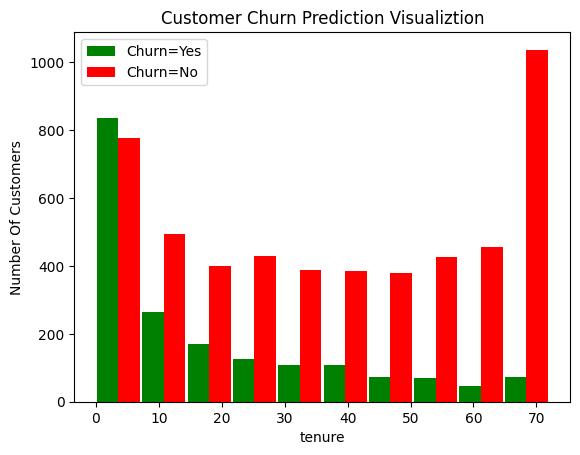

In [13]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Observations:**

Almost 800 of those who became a customer for a year or less ended up leaving the company. It's not unusual to have a higher churn rate in the first year or two for some types of business. Nevertheless, a churn rate this high in the first year indicates that the quality of the service provided fails to hold up to their new customers expectation.

# **Data preprocessing**

Convert object features to numeric

In [14]:
columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
df=df.replace("No internet service","No")
df=df.replace("No phone service","No")
for column in columns:
  df[column]=df[column].map({"No":0, "Yes":1})

In [15]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

**Ordinal Encoder**:

Ordinal encoding is a preprocessing technique used for converting categorical data into numeric values that preserve their inherent ordering.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

a=['InternetService','Contract','PaymentMethod']
oe=OrdinalEncoder()
df[a]=oe.fit_transform(df[a])

Check the no.of blank rows exist in the TotalCharges column

In [17]:
len(df.loc[(df['TotalCharges']==' ')])

11

Replace blank with zero

In [18]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")

Change the type to float

In [19]:
df['TotalCharges']=df['TotalCharges'].astype('float')

check datatype after preprocessing

In [20]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService     float64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract            float64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0.0,0,1,0,0,0,0,0.0,1,2.0,29.85,29.85,0
1,1,0,0,0,34,1,0,0.0,1,0,1,0,0,0,1.0,0,3.0,56.95,1889.50,0
2,1,0,0,0,2,1,0,0.0,1,1,0,0,0,0,0.0,1,3.0,53.85,108.15,1
3,1,0,0,0,45,0,0,0.0,1,0,1,1,0,0,1.0,0,0.0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1.0,0,0,0,0,0,0,0.0,1,2.0,70.70,151.65,1


**Correlation Matrix**

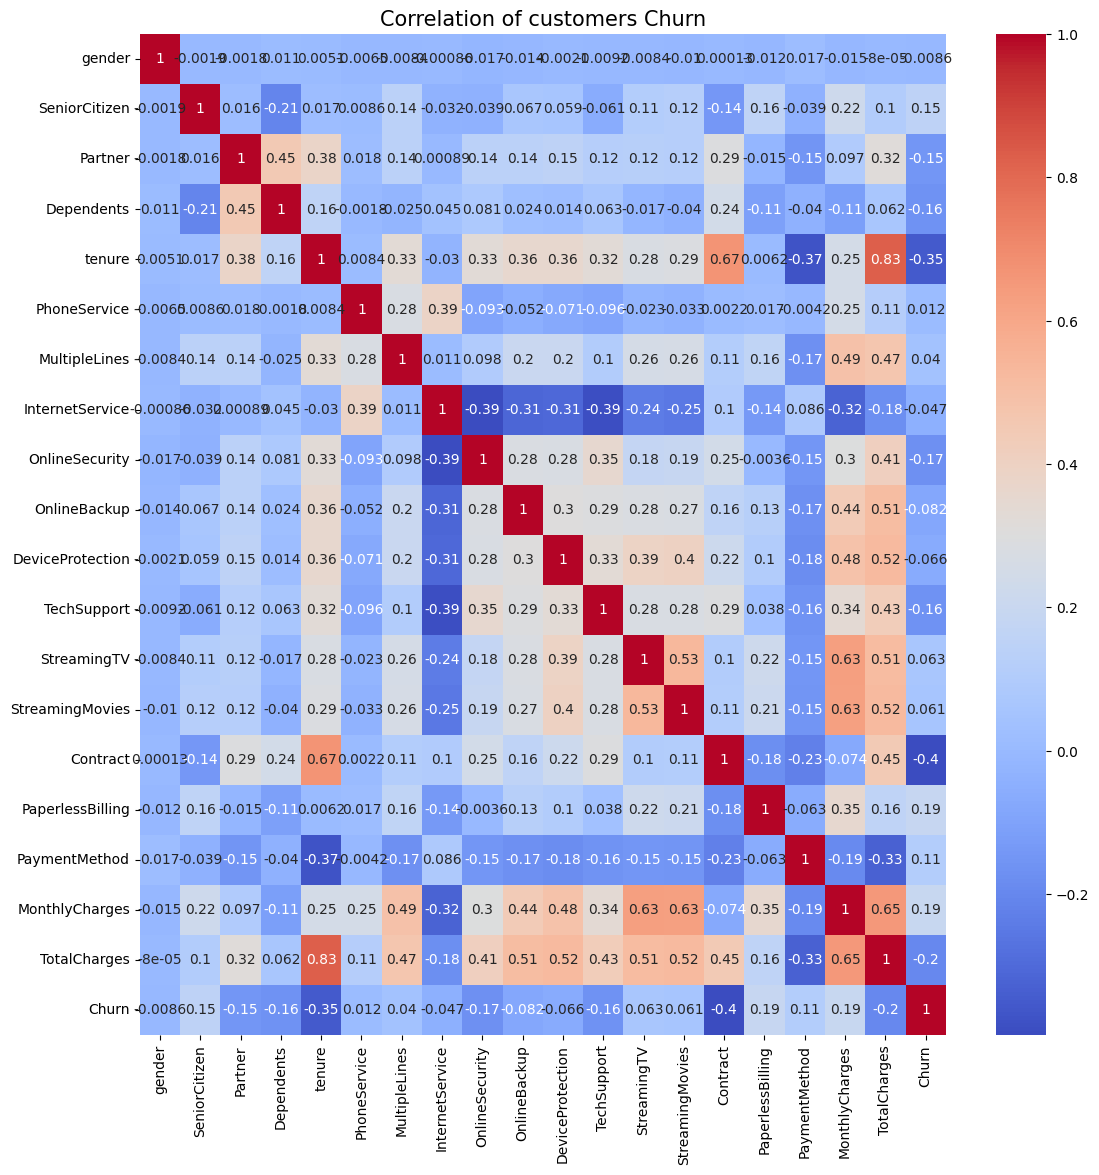

In [22]:
plt.figure(figsize=(13,13))
plt.title('Correlation of customers Churn',fontsize=15)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation\xa0w.r.t\xa0Outcome')

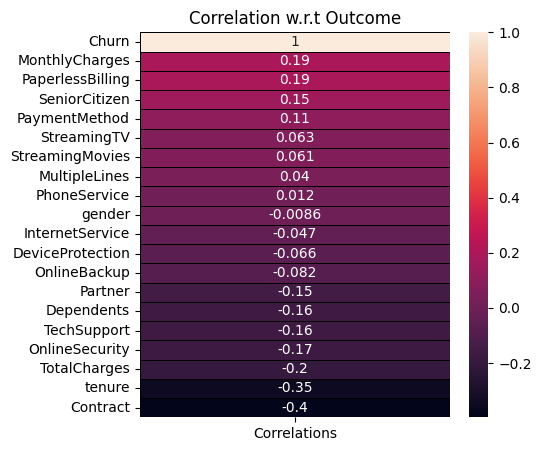

In [23]:
corr=df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']
plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,linewidths=0.4,linecolor='black')
plt.title('Correlation w.r.t Outcome')

**MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService** does not display any kind of correlation.

Remaining features either display a significant positive or negative correlation.

## **Feature** **scaling**

In [24]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,0.0,0,1,0,0,0,0,0.0,1,2.0,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0.0,1,0,1,0,0,0,1.0,0,3.0,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0.0,1,1,0,0,0,0,0.0,1,3.0,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,0,0.0,1,0,1,1,0,0,1.0,0,0.0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1.0,0,0,0,0,0,0,0.0,1,2.0,0.521891,0.017462,1


# **X,Y splitting**

In [25]:
X=df.drop(['Churn'],axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,0,0.0,0,1,0,0,0,0,0.0,1,2.0,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0.0,1,0,1,0,0,0,1.0,0,3.0,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0.0,1,1,0,0,0,0,0.0,1,3.0,0.354229,0.012453
3,1,0,0,0,0.625000,0,0,0.0,1,0,1,1,0,0,1.0,0,0.0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1.0,0,0,0,0,0,0,0.0,1,2.0,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,0.0,1,0,1,1,1,1,1.0,1,3.0,0.662189,0.229194
7039,0,0,1,1,1.000000,1,1,1.0,0,1,1,0,1,1,1.0,1,1.0,0.845274,0.847792
7040,0,0,1,1,0.152778,0,0,0.0,1,0,0,0,0,0,0.0,1,2.0,0.112935,0.039892
7041,1,1,1,0,0.055556,1,1,1.0,0,0,0,0,0,0,0.0,1,3.0,0.558706,0.035303


In [26]:
y=df.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**Check dataset balanced or not**

In [27]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

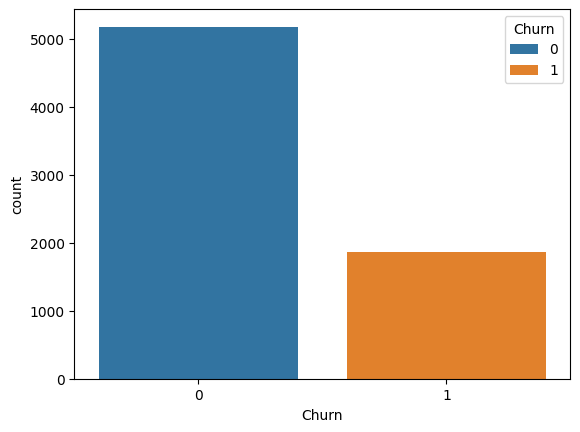

In [28]:
sns.countplot(data=df,x='Churn',hue='Churn')

**Observations:**

*   The dataset is imbalanced
*   There is a huge difference between the two obsevations of Churn



# **Handling imbalanced dataset using SMOTE**

**OverSampling:**

Increase the minority samples of the target variable to the majority samples.

In [29]:
from imblearn.over_sampling import SMOTE

os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [30]:
y_os.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

**Train Test Split**

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=100)

In [32]:
X_train.shape

(7243, 19)

In [33]:
X_test.shape

(3105, 19)

In [34]:
y_train.shape

(7243,)

In [35]:
y_test.shape

(3105,)

# **Model Building**

**1. KNeighbors Classifier**



In [36]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)

0.814170692431562
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1557
           1       0.77      0.90      0.83      1548

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



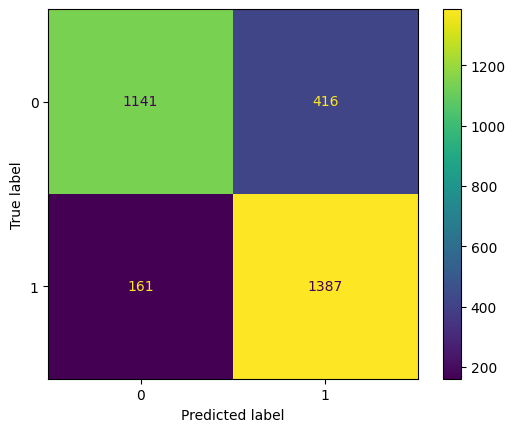

In [37]:
Accuracy1=accuracy_score(y_test,y_pred1)
print(Accuracy1)
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

**2. Support Vector Machine(SVC)**

In [38]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)

0.7925925925925926
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      1557
           1       0.77      0.83      0.80      1548

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



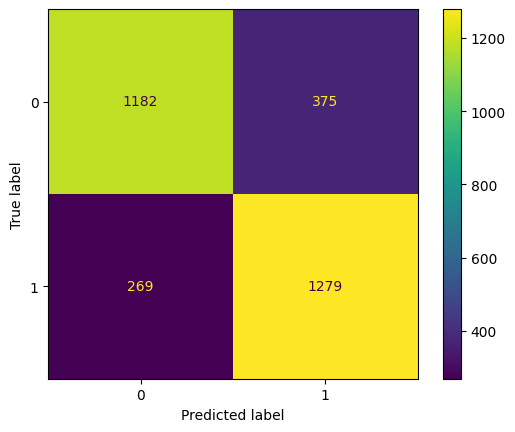

In [39]:
Accuracy2=accuracy_score(y_test,y_pred2)
print(Accuracy2)
print(classification_report(y_test,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

**3. Decision tree Classifier**

In [40]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)

0.7990338164251207
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1557
           1       0.77      0.85      0.81      1548

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



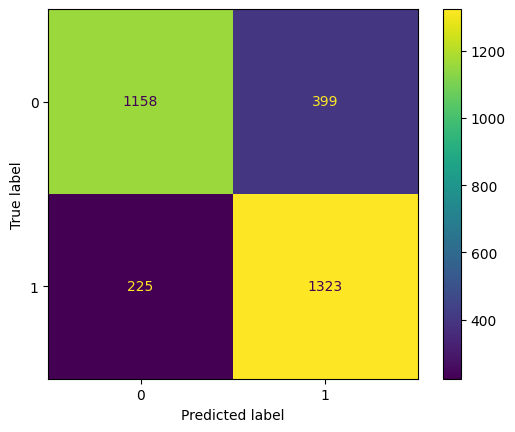

In [41]:
Accuracy3=accuracy_score(y_test,y_pred3)
print(Accuracy3)
print(classification_report(y_test,y_pred3))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

**4. Random Forest Classifier**

In [42]:
rf=RandomForestClassifier(criterion='entropy',max_depth=42)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

0.855072463768116
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1557
           1       0.84      0.87      0.86      1548

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



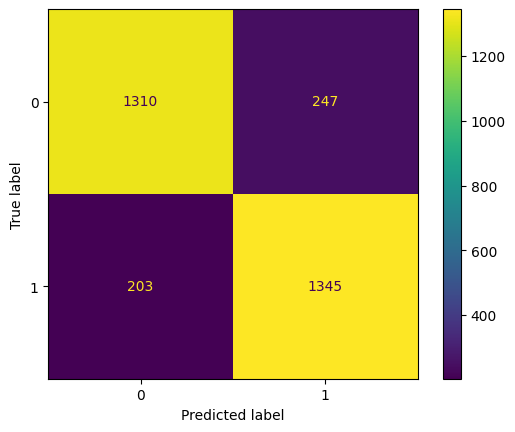

In [43]:
Accuracy4=accuracy_score(y_test,y_pred4)
print(Accuracy4)
print(classification_report(y_test,y_pred4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))

**5. AdaBoost Classifier**

In [44]:
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred5=ab.predict(X_test)

0.8064412238325281
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1557
           1       0.79      0.83      0.81      1548

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



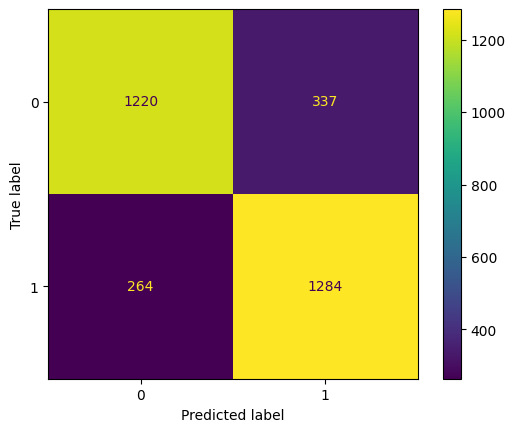

In [45]:
Accuracy5=accuracy_score(y_test,y_pred5)
print(Accuracy5)
print(classification_report(y_test,y_pred5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

**Comparing Accuracies**

In [46]:
Final_data=pd.DataFrame({'Models':['KNN','SVM','Decision Tree','Random Forest','Ada Boost'],
                         'Accuracy':[Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5]})
Final_data['Accuracy']=Final_data['Accuracy']*100
Final_data

,Models,Accuracy
0,KNN,81.417069
1,SVM,79.259259
2,Decision Tree,79.903382
3,Random Forest,85.507246
4,Ada Boost,80.644122


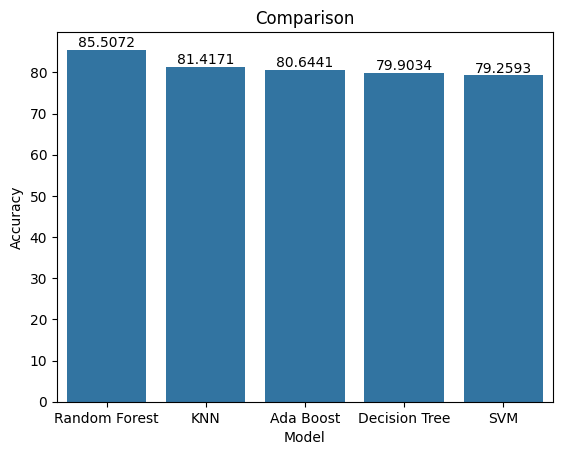

In [47]:
ax=sns.barplot(x='Models',y='Accuracy',data=Final_data.sort_values(by='Accuracy',ascending=False))
ax.set(xlabel='Model',ylabel='Accuracy',title='Comparison')
ax.bar_label(ax.containers[0])
plt.show()

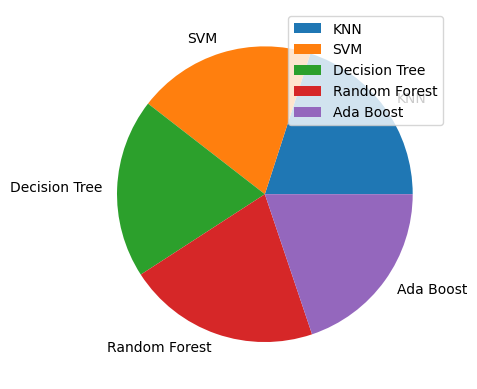

In [48]:
plt.pie(Final_data['Accuracy'],labels=Final_data['Models'],data=Final_data)
plt.legend(loc=1)
plt.show()

**observations:**


*   Random Forest classifier has the high accuracy

*  SVM classifier has the low accuracy





Predict with new values

In [49]:
y_new=rf.predict([[1,0,0,0,0.027778,1,0,0.0,1,1,0,0,0,0,0.0,1,3.0,0.354229,0.012453]])
if y_new==0:
  print("The customer is happy with the service")
else:
  print("The customer will terminate the service")

The customer will terminate the service


# **Conclusion**

Here build five types of classification models and find the accuracies of each model.By comparing the performance, **RandomForest classifier** has the highest accuracy of **85%** and select the best model as RandomForest classifier

**Save the model**

In [50]:
import pickle

filename ='model.sav'
pickle.dump(rf, open(filename,'wb'))
load_model=pickle.load(open(filename,'rb'))
load_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
accuracy=accuracy_score(y_test,y_pred4)*100
print("Accuracy of the loaded model:",accuracy)

Accuracy of the loaded model: 85.5072463768116


# **Streamlit web**

In [52]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [53]:
%%writefile app.py

Writing app.py


In [54]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.318s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [55]:
! wget -q -o - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.32.150.169


npx: installed 22 in 2.789s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.32.150.169:8501

your url is: https://curvy-donuts-help.loca.lt
